### Central Limit Theorem
The Central Limit Theorem states that if $n$ independently and identically distributed random variables are sampled, as $n \to \infty$, the distribution of the sample mean of the random variables is normally distributed.

**Inspired by:** [But what is the Central Limit Theorem? - 3Blue1Brown](https://youtu.be/zeJD6dqJ5lo])

In [8]:
import matplotlib.pyplot as plt
import random
import math

DICE_MIN = 1
DICE_MAX = 6
DICE_PROB = 1/6

We start by defining some functions about the dice.

In [9]:
# A function that returns a dice number with unweighted odds
def dice():
    return math.floor( random.uniform(0,5) ) + 1

# A dice distribution function
def diceDistribution(x):
    if x >= DICE_MIN and x <= DICE_MAX: return DICE_PROB
    return 0


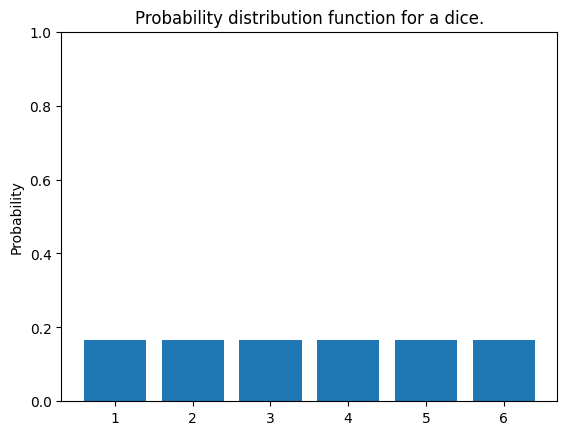

In [11]:
x = [i for i in range(DICE_MIN, DICE_MAX+1)]
y = [diceDistribution(i) for i in range(DICE_MIN, DICE_MAX+1)]

ax = plt.gca()
ax.bar(x, y)
ax.set_ylabel("Probability")
ax.set_title("Probability distribution function for a dice.")
ax.set_ylim([0,1])
plt.show()

We will let $X$ be a random variable following the dice distribution, which is a discrete distribution.

We will now try to compute a distribution for $X_{1} + X_{2}$

We will call it `dd2`, as an abbreviation for dice distribution 2. The integer 2 here indicates that its a sum of 2 random variables.



In [33]:
def dd2(x):
    dd2_min = 2 * DICE_MIN
    dd2_max = 2 * DICE_MAX
    x1_domain = [i for i in range(DICE_MIN, DICE_MAX+1)]
    x2_domain = [i for i in range(DICE_MIN, DICE_MAX+1)]
    # Calculating the cumulative distribution is like calculating a prefix sum
    x1_cd = [diceDistribution(DICE_MIN)]
    x2_cd = [diceDistribution(DICE_MIN)]
    for i in range(DICE_MIN, DICE_MAX):
        cd = diceDistribution(i) + x1_cd[i-1]
        x1_cd.append(cd)
        x2_cd.append(cd)
    # Flip x2 as part of the convolution process
    x2_domain = x2_domain[::-1]
    x2_cd = x2_cd[::-1]
    
    x3_domain = []
    x3_prob = []
    # Keep track of pointers for the x2 domain
    end = 0
    start = 0 - DICE_MAX + 1
    print(x1_domain)
    print(x2_domain)
    # The convolution process
    # Pxy = Px * Py
    while start <= 5:
        start_overlap = max(start, DICE_MIN-1)
        end_overlap = min(end, DICE_MAX-1)
        value = 0
        if end <= DICE_MAX -1:
            value = x1_domain[end_overlap] + x2_domain[-1]            
        elif start <= DICE_MAX -1:
            value = x1_domain[start_overlap] + x2_domain[0]
        #prob = (x1_cd[end_overlap] - x1_cd[start_overlap]) + (x2_cd[-start_overlap] - x2_cd[-end_overlap])
        #print(value, prob)
        if start_overlap == 0 and end_overlap == 0:
            prob = diceDistribution(1)*diceDistribution(1)
        elif start_overlap > 0:
            prob = (x1_cd[end_overlap]-x1_cd[start_overlap-1])
        print(value, prob)
            
        start += 1
        end += 1
        
        
dd2(1)

[1, 2, 3, 4, 5, 6]
[6, 5, 4, 3, 2, 1]
Test
2 0.027777777777777776
3 0.027777777777777776
4 0.027777777777777776
5 0.027777777777777776
6 0.027777777777777776
7 0.027777777777777776
8 0.8333333333333333
9 0.6666666666666665
10 0.4999999999999999
11 0.33333333333333326
12 0.16666666666666663
